# Fisheries Monitoring Kaggle Challenge

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import glob
from scipy.misc import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import seaborn as sns

new_style = {'grid': False}
plt.rc('axes', **new_style)
p = sns.color_palette()

In [2]:
# Data loading
train_files = sorted(glob.glob('data/train/*/*.jpg'))
train = np.array([imread(img) for img in train_files])
labels = pd.read_csv('data/detection_labels/boxes.csv',names = ["img", "x","y","width","height"])

Length of training set:  3777

ALB    1719
YFT     734
NoF     465
OTH     299
BET     200
SHA     176
DOL     117
LAG      67
dtype: int64

Distribution of classes:


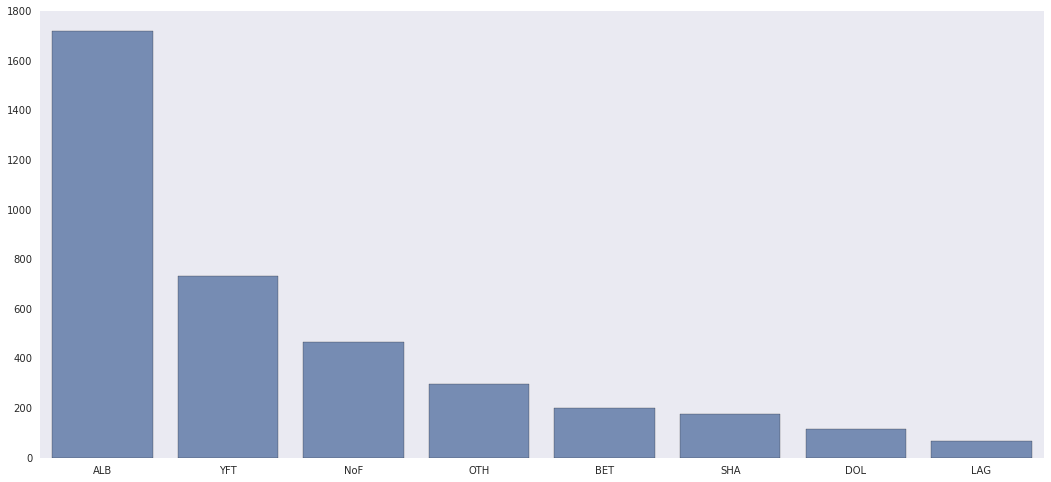

In [3]:
categories = np.array([name[11:14] for name in train_files])
cat = pd.Series(categories).value_counts()
plt.figure(figsize=(18,8))
sns.barplot(cat.index, cat.values, alpha=0.8, color=p[0])
print "Length of training set: ", len(train)
print
print cat
print
print "Distribution of classes:"

Distribution of image sizes:

(720, 1280, 3)    2174
(750, 1280, 3)     598
(974, 1280, 3)     395
(718, 1276, 3)     220
(670, 1192, 3)     198
(924, 1280, 3)      60
(854, 1518, 3)      39
(974, 1732, 3)      35
(750, 1334, 3)      31
(700, 1244, 3)      27
dtype: int64


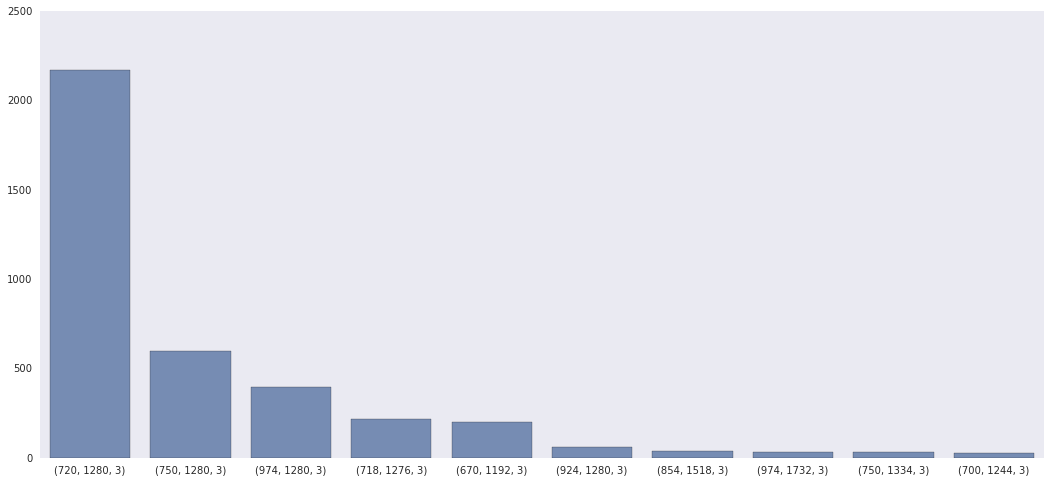

In [4]:
shapes = np.array([str(img.shape) for img in train])
num_shapes = pd.Series(shapes).value_counts()
plt.figure(figsize=(18,8))
sns.barplot(num_shapes.index, num_shapes.values, alpha=0.8, color=p[0])
print "Distribution of image sizes:"
print 
print num_shapes

# 1. Visualizing bounding boxes

File name:  YFT/img_06687.jpg
Number of boxes:  1


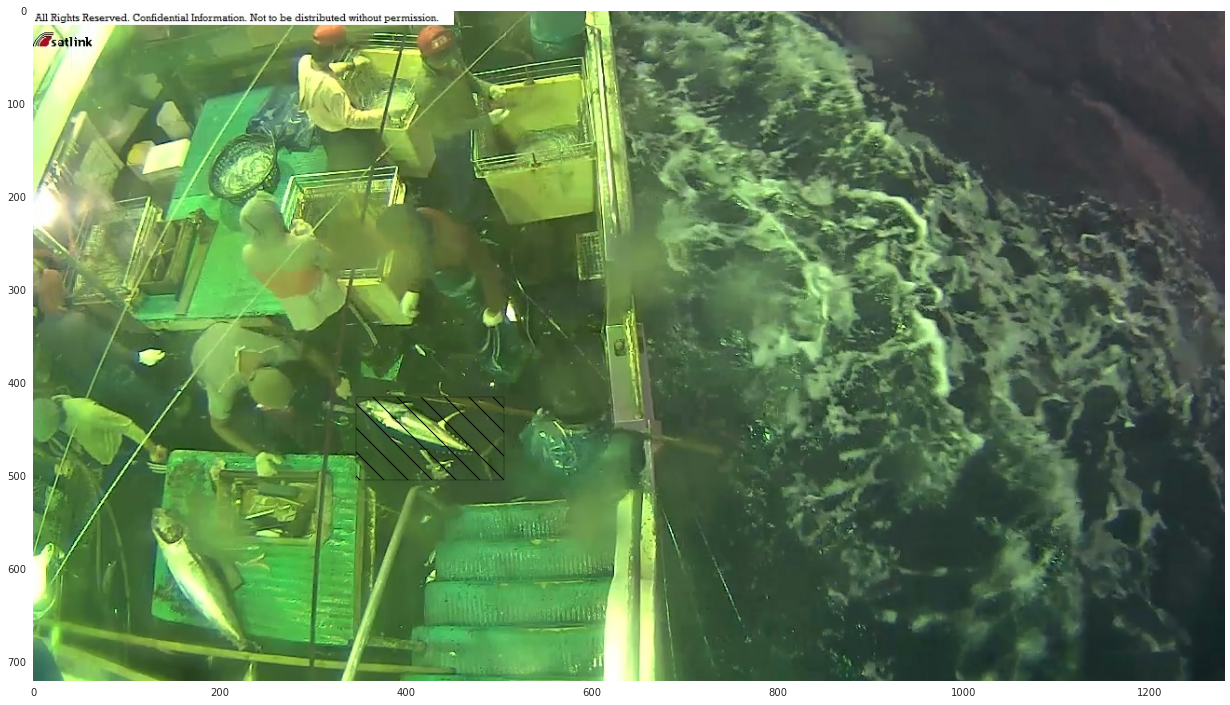

In [17]:
n = np.random.choice(len(train))
file_name = train_files[n][11:]
print "File name: ", file_name

_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(train[n])
boxes = labels[labels["img"] == file_name]
print "Number of boxes: ", len(boxes)

for i in xrange(len(boxes)):
    box = boxes.iloc[i,]
    x, y, width, height = box[1], box[2], box[3], box[4]
    ax.add_patch(
    patches.Rectangle(
        (x, y), # x,y
        width, # width
        height, # height
        hatch='\\',
        fill=False      # remove background
            )
        )

Total number of pictures with fishes:  3312
Total number of pictures with bounding boxes:  3310
Distribution of the number of boxes per picture:

1    2619
2     487
3     125
4      38
5      18
7      14
6       5
8       3
9       1
Name: x, dtype: int64


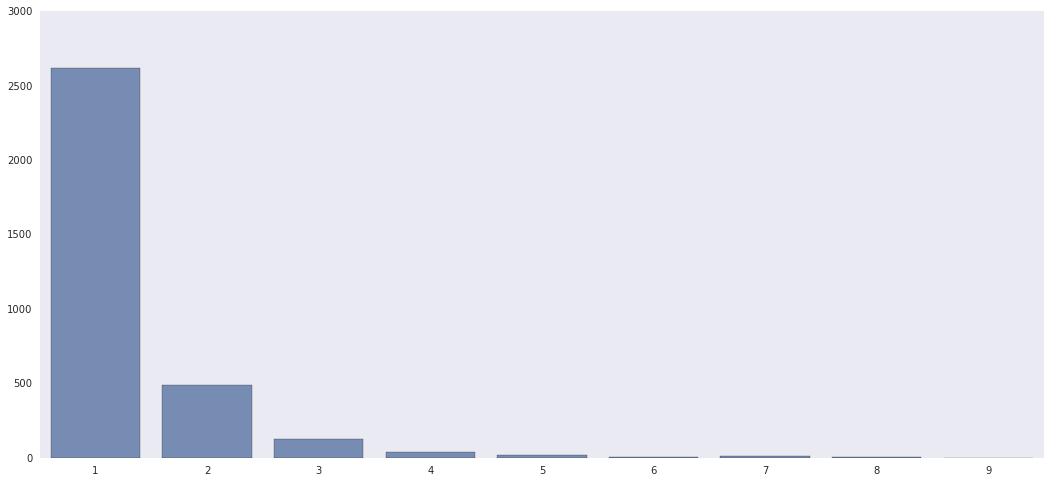

In [6]:
num_boxes = labels.groupby("img")["x"].count().value_counts()
plt.figure(figsize=(18,8))
sns.barplot(num_boxes.index, num_boxes.values, alpha=0.8, color=p[0])
print "Total number of pictures with fishes: ", len(train) - cat["NoF"]
print "Total number of pictures with bounding boxes: ", len(labels["img"].unique())
print "Distribution of the number of boxes per picture:"
print
print num_boxes

# 2. Cropping fishes from original data

File name:  data/train/ALB/img_00277.jpg
Number of boxes:  3


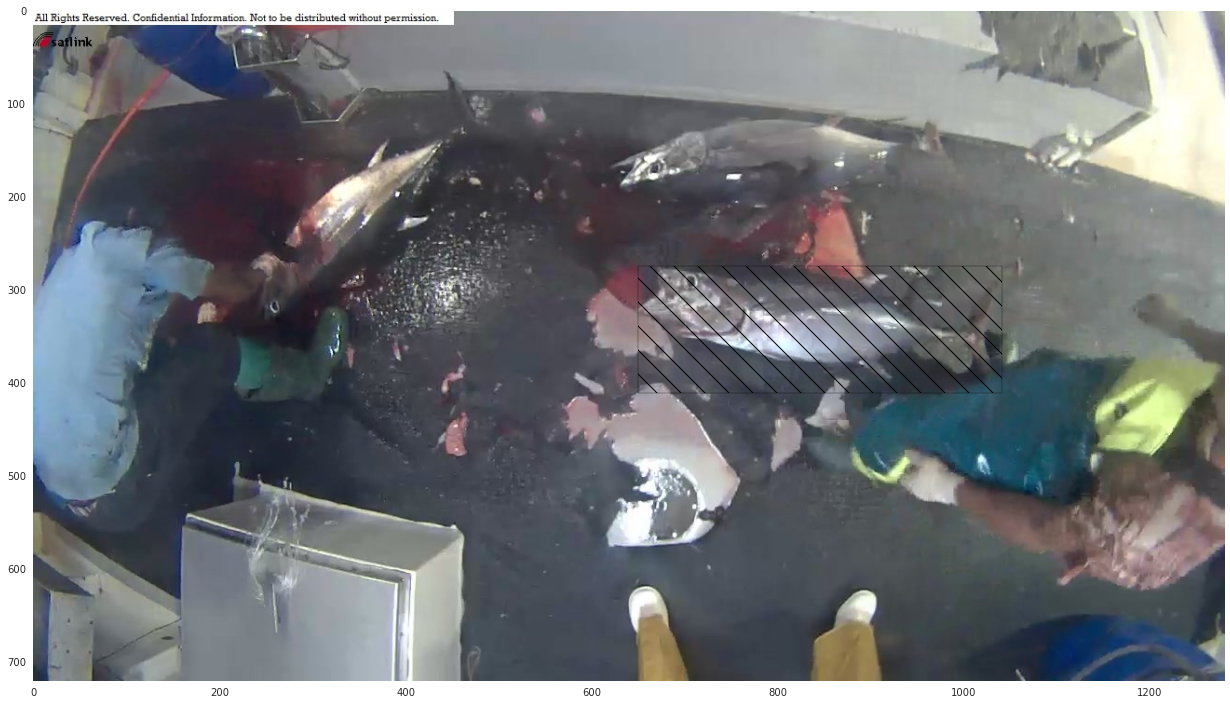

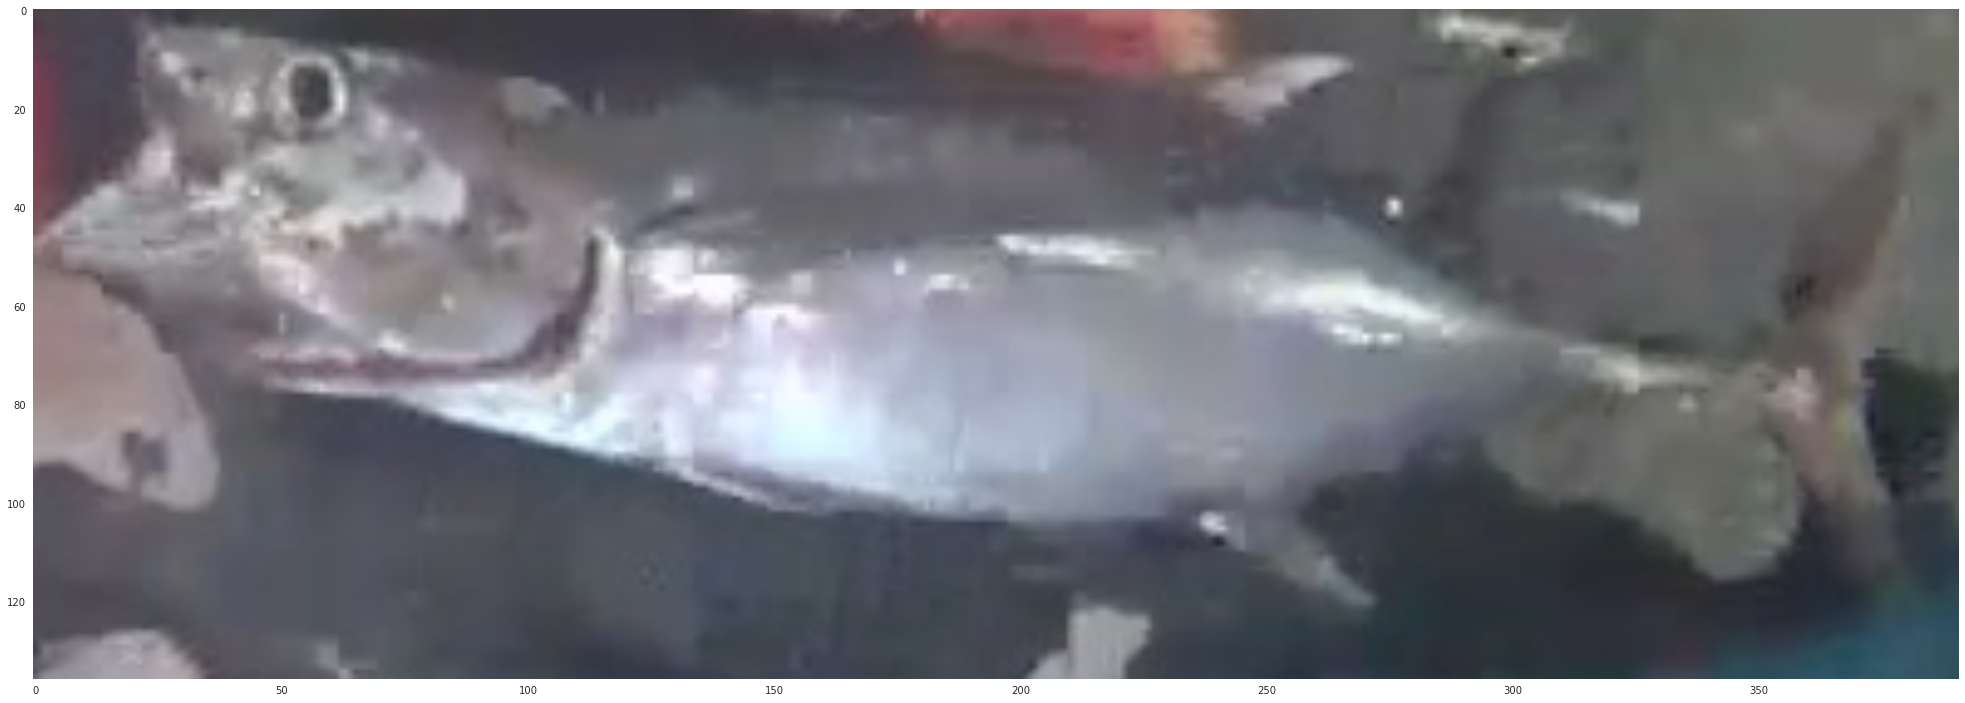

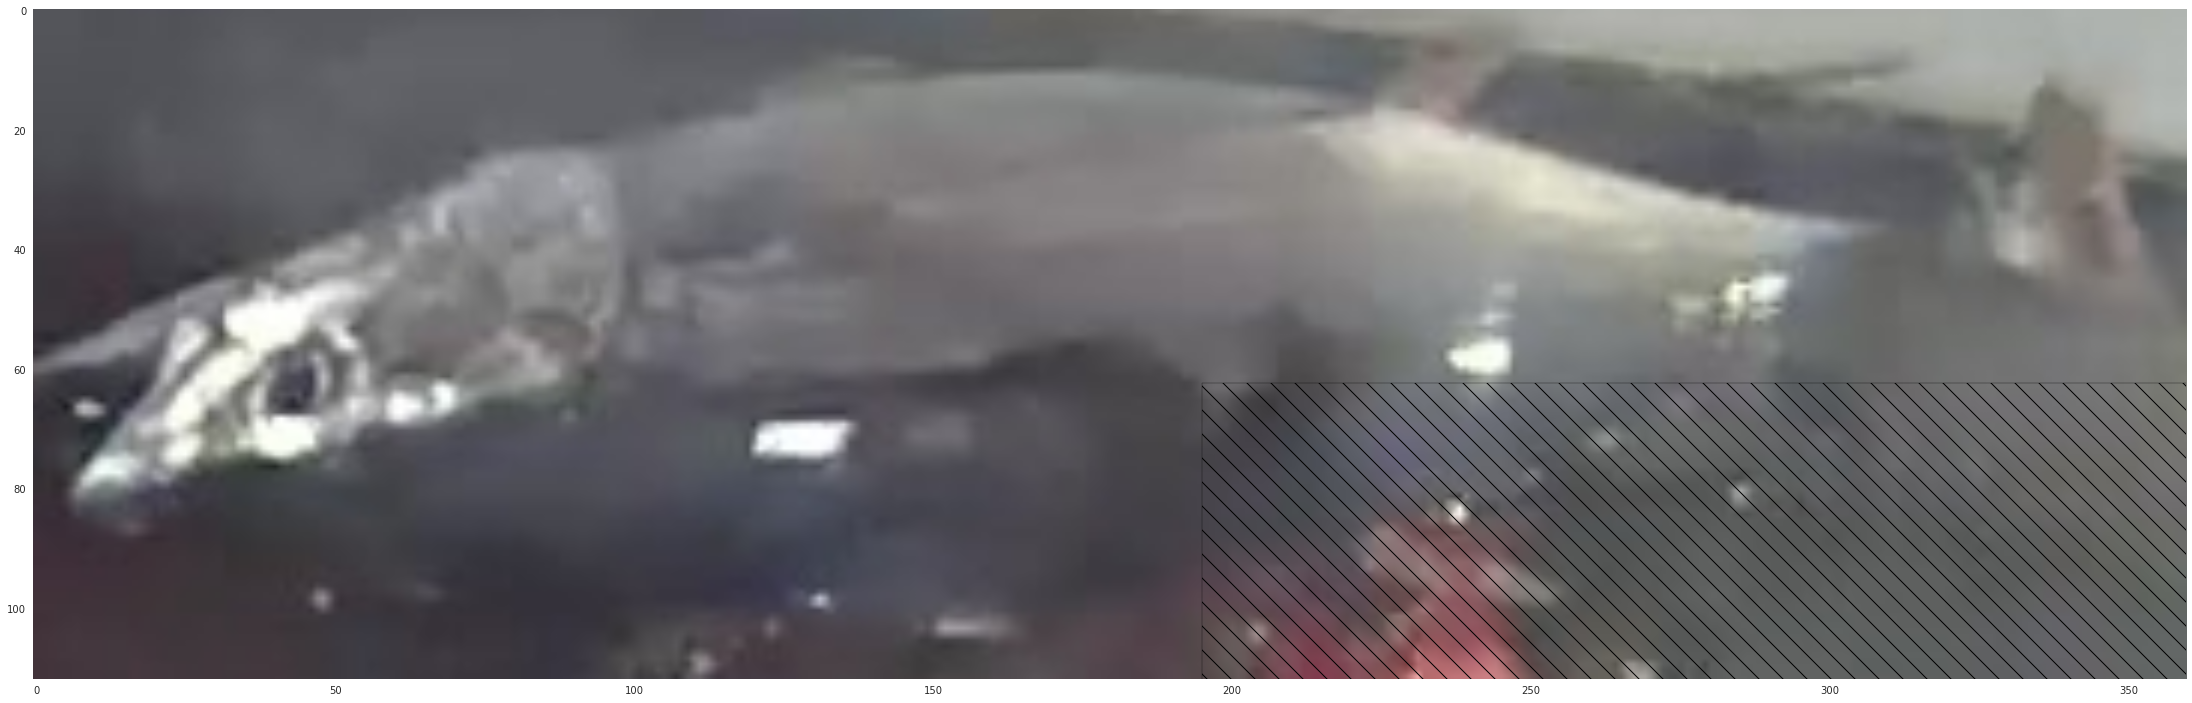

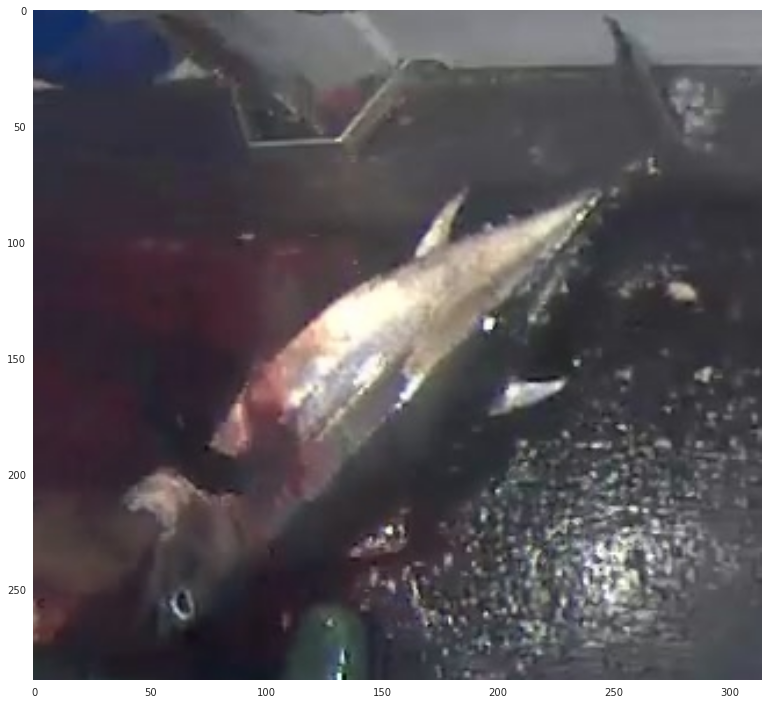

In [7]:
n = np.random.choice(len(train))
file_name = train_files[n]
img = Image.open(file_name)
print "File name: ", file_name

_, ax = plt.subplots(1, 1, figsize=(80, 12))
ax.imshow(img)
boxes = labels[labels["img"] == file_name[11:]]
print "Number of boxes: ", len(boxes)

for i in xrange(len(boxes)):
    box = boxes.iloc[i,]
    x, y, width, height = box[1], box[2], box[3], box[4]
    ax.add_patch(
    patches.Rectangle(
        (x, y), # x,y
        width, # width
        height, # height
        hatch='\\',
        fill=False      # remove background
            )
        )
#     print x,y,width,height
    left = int(round(x))
    right = int(round(x + width))
    top = int(round(y))
    bottom = int(round(y + height))
#     print left, top, right, bottom
    img_new = img.crop((left,top,right,bottom))
    _, ax = plt.subplots(1, 1, figsize=(80, 12))
    ax.imshow(img_new)
    img_new.save("cropped_data/" + file_name[11:-4] + '-' + str(i) + '.jpg')

In [8]:
# Crop all the fishes and save them as separate files.
# Fishes cropped from the same image are saved as filename-0, filename-1, filename-2, ...

for file_name in train_files:
    img = Image.open(file_name)
    boxes = labels[labels["img"] == file_name[11:]]

    for i in xrange(len(boxes)):
        box = boxes.iloc[i,]
        x, y, width, height = box[1], box[2], box[3], box[4]
        left = int(round(x))
        right = int(round(x + width))
        top = int(round(y))
        bottom = int(round(y + height))

        img_new = img.crop((left,top,right,bottom))
        img_new.save("cropped_data/" + file_name[11:-4] + '-' + str(i) + '.jpg')

In [9]:
# Load all cropped data

cropped_train_files = sorted(glob.glob('cropped_data/*/*.jpg'))
cropped_train = np.array([imread(img) for img in cropped_train_files])

Total number of cropped images:  4371
Distribution of the length (blue) and the width (green) of the cropped images:


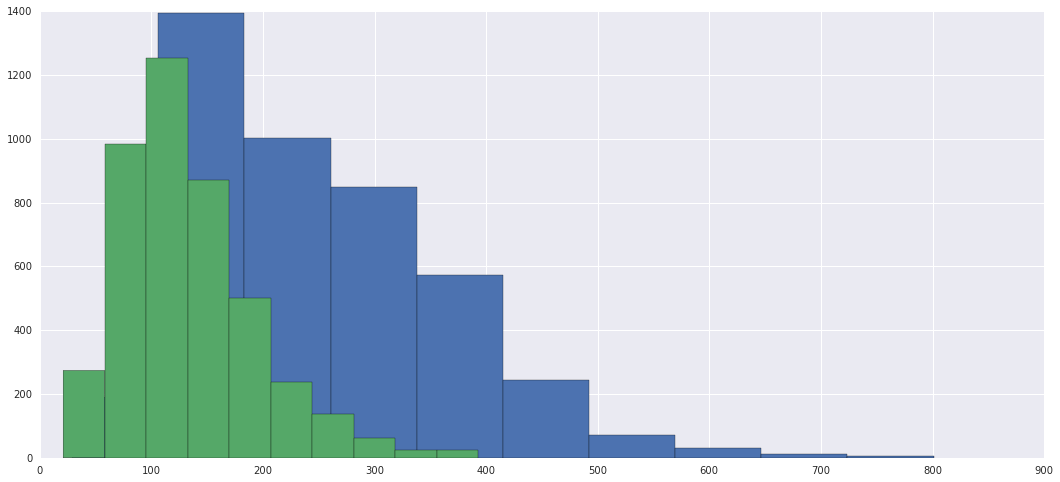

In [10]:
# A histogram of the dimensions for the cropped data

cropped_shapes_long = np.array([max(img.shape[0:2]) for img in cropped_train])
cropped_shapes_short = np.array([min(img.shape[0:2]) for img in cropped_train])
plt.subplots(1, 1, figsize=(18, 8))
num_cropped_shapes_long = pd.Series(cropped_shapes_long).hist()
num_cropped_shapes_short = pd.Series(cropped_shapes_short).hist()
print "Total number of cropped images: ", len(cropped_train)
print "Distribution of the length (blue) and the width (green) of the cropped images:"